# *Declarative* *Statistical* Visualization with Altair

*Source for talk given on Nov 9, 2016. See the full talk slides [on SpeakerDeck](https://speakerdeck.com/jakevdp/visualization-in-python-with-altair).*

## Pain-points in Python Visualization

"I have been using Matplotlib for a decade now, and I still have to look most things up"

"I love Python but I switch to R for my visualizations."

"Some combination of matplotib, seaborn, and Bokeh usually does the trick for me."

## Plotting with Matplotlib

http://matplotlib.org/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.rc('figure', figsize=(8, 6))

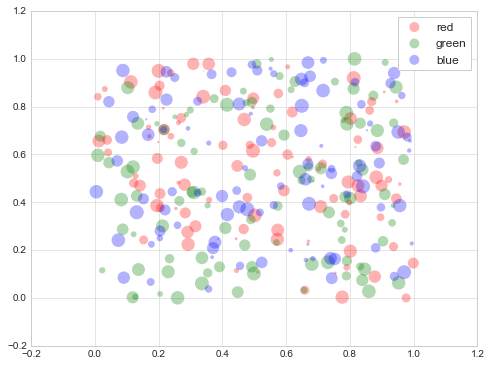

In [2]:
import matplotlib.pyplot as plt
from numpy.random import rand

for color in ['red', 'green', 'blue']:
    x, y = rand(2, 100)
    size = 200.0 * rand(100)
    plt.scatter(x, y, c=color, s=size, label=color,
                alpha=0.3, edgecolor='none')

plt.legend(frameon=True);

## Matplotlib: Pros and Cons

### Advantages:

- Matlab-like API
- Well-tested, standard tool for over a decade
- LOADS of rendering backends
- Can reproduce just about any plot… if you have the time

### Disadvantages:

- Matlab-like API
- Poor stylistic defaults (though improving in version 2.0)
- Imperative model: lots of boilerplate and manual tweaking required (though see Seaborn & ggplot)
- Poor support for web/interactive graphs (though see mpld3)
- Can be slow for larger data


## Matplotlib Gallery

In [3]:
from IPython.display import IFrame
IFrame('http://matplotlib.org/gallery.html', 800, 600)

## Plotting with Bokeh

http://bokeh.pydata.org/

In [4]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [5]:
from numpy import pi, arange, sin, linspace

from bokeh.plotting import output_file, figure, show
from bokeh.models import LinearAxis, Range1d

p = figure()

for color in ['red', 'green', 'blue']:
    x, y = rand(2, 100)
    size = 0.03 * rand(100)
    p.circle(x, y, fill_color=color, radius=size, legend=color,
             fill_alpha=0.3, line_color=None)

show(p)

## Bokeh Pros & Cons

### Advantages:

- Browser-based interactivity built-in
- Imperative and Declarative layer
- Handles large and/or streaming datasets
- Modern default plot styles

### Disadvantages:

- Only output is PNG (need PDF/EPS for a scientific publication? Sorry!)
- Newer tool with a smaller user-base than matplotlib

## Bokeh Gallery

In [6]:
IFrame('http://bokeh.pydata.org/en/latest/docs/gallery.html', 800, 600)

## Moving to *Statistical* Visualization

In [7]:
from altair import load_dataset
iris = load_dataset('iris')
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


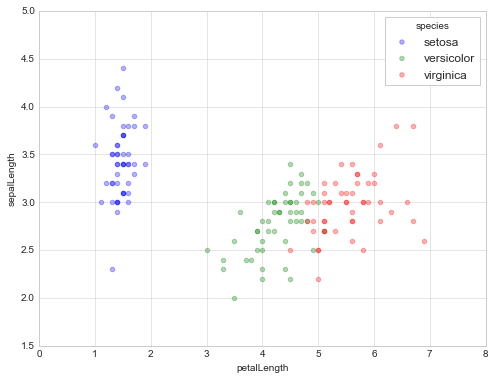

In [8]:
color_map = dict(zip(iris.species.unique(), ['blue', 'green', 'red']))

for species, group in iris.groupby('species'):
    plt.scatter(group['petalLength'], group['sepalWidth'],
                color=color_map[species],
                alpha=0.3, edgecolor=None,
                label=species)
    
plt.legend(frameon=True, title='species')
plt.xlabel('petalLength')
plt.ylabel('sepalLength');

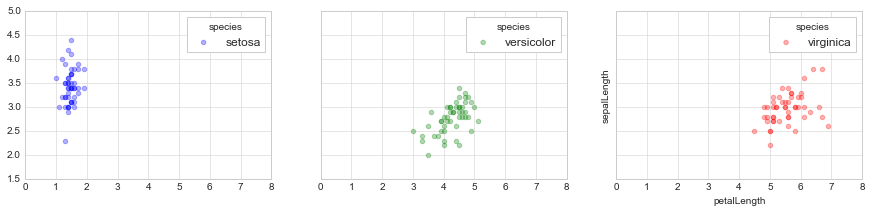

In [9]:
color_map = dict(zip(iris.species.unique(), ['blue', 'green', 'red']))
n_panels = len(color_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 5, 3),
                       sharex=True, sharey=True)

for i, (species, group) in enumerate(iris.groupby('species')):
    ax[i].scatter(group['petalLength'], group['sepalWidth'],
                  color=color_map[species],
                  alpha=0.3, edgecolor=None,
                  label=species)
    ax[i].legend(frameon=True, title='species')

plt.xlabel('petalLength')
plt.ylabel('sepalLength');

## On to *Declarative* Statistical Visualization

### Seaborn: *Almost* Declarative...

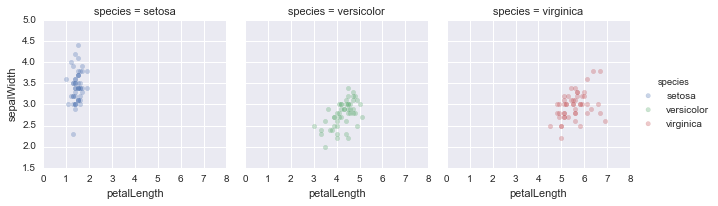

In [10]:
import seaborn as sns
g = sns.FacetGrid(iris, col="species", hue="species")
g.map(plt.scatter, "petalLength", "sepalWidth", alpha=0.3)
g.add_legend();

### Altair

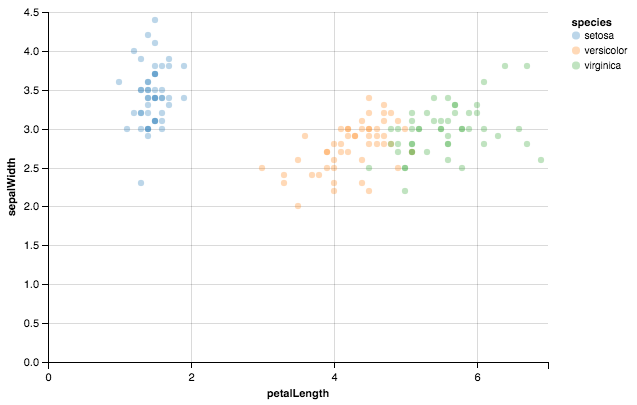

In [11]:
from altair import Chart

Chart(iris).mark_circle(
    opacity=0.3
).encode(
    x='petalLength',
    y='sepalWidth',
    color='species'
)

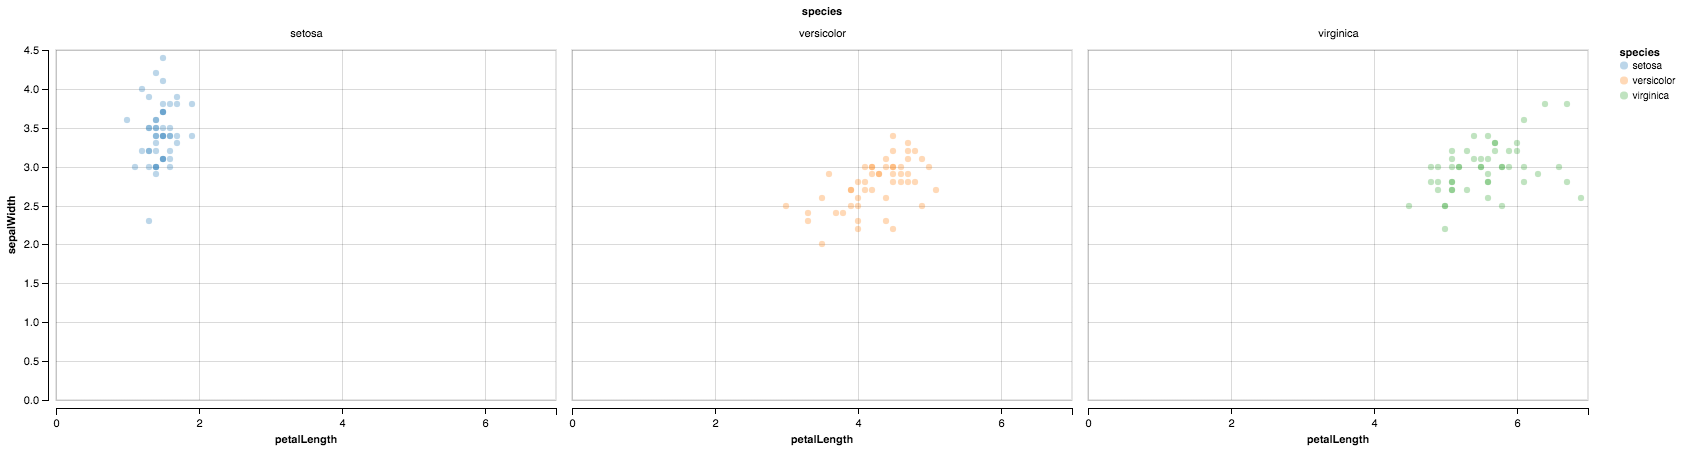

In [12]:
from altair import Chart

Chart(iris).mark_circle(
    opacity=0.3
).encode(
    x='petalLength',
    y='sepalWidth',
    color='species',
    column='species'
)

## What is Altair?

### D3

### Vega

### Vega-Lite

### Altair

## From Declarative *API* to Declarative *Grammar*

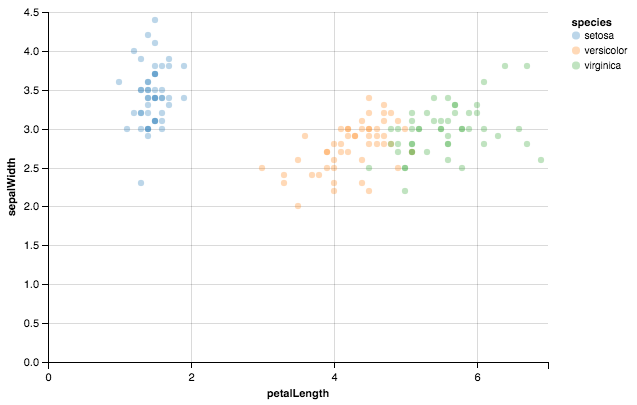

In [13]:
url = load_dataset('iris', url_only=True)

chart = Chart(url).mark_circle(
    opacity=0.3
).encode(
    x='petalLength:Q',
    y='sepalWidth:Q',
    color='species:N',
)

chart

In [14]:
chart.to_dict()

{'config': {'mark': {'opacity': 0.3}},
 'data': {'url': 'https://vega.github.io/vega-datasets/data/iris.json'},
 'encoding': {'color': {'field': 'species', 'type': 'nominal'},
  'x': {'field': 'petalLength', 'type': 'quantitative'},
  'y': {'field': 'sepalWidth', 'type': 'quantitative'}},
 'mark': 'circle'}

## Why *Another* Plotting Library?

Key: Think of this not as another plotting library, but an interface to declarative visualization grammar.

- **Teaching**: students can learn visualization concepts with minimal syntactic distraction.

- **Publishing**: Instead of publishing pixels, can publish data + plot specification for greater flexibility & reproducibility.

- **Cross-Pollenation**: Vega-Lite has the potential to provide a cross-platform *lingua franca* of statistical visualization.


## Altair Key Features

- Data specified in *Tidy Format* & linked to a declared type: Quantitative, Nominal, Ordinal, Temporal
- Well-defined set of marks to represent data
- *Channels* map *data features* (i.e. columns) to *visual encodings* (e.g. x, y, color, size, shape, row, column, etc.)
- Simple data transformations supported natively

## Examples

### Demo: Seattle Weather

In [15]:
from altair import load_dataset
data = load_dataset('seattle-weather')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012/01/01,0.0,12.8,5.0,4.7,drizzle
1,2012/01/02,10.9,10.6,2.8,4.5,rain
2,2012/01/03,0.8,11.7,7.2,2.3,rain
3,2012/01/04,20.3,12.2,5.6,4.7,rain
4,2012/01/05,1.3,8.9,2.8,6.1,rain


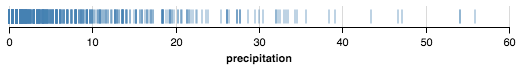

In [16]:
from altair import Chart

Chart(data).mark_tick().encode(
    x='precipitation',
)

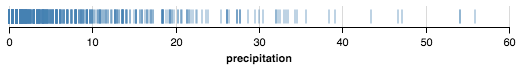

In [17]:
from altair import X

Chart(data).mark_tick().encode(
    X('precipitation:Q'),
)

In [18]:
X?

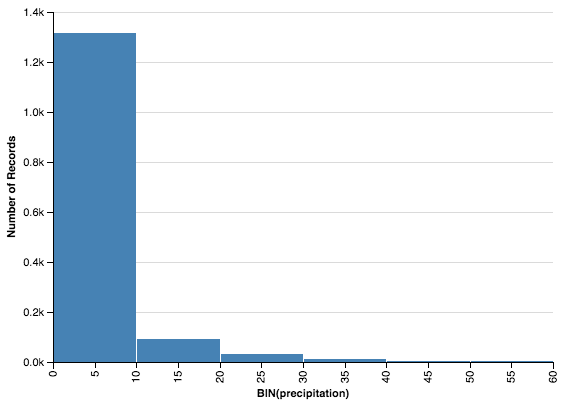

In [19]:
from altair import X, Y

Chart(data).mark_bar().encode(
    X('precipitation', bin=True),
    Y('count(*):Q')
)

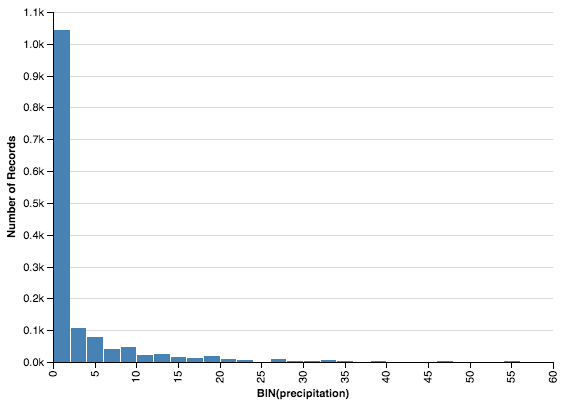

In [20]:
from altair import Bin

Chart(data).mark_bar().encode(
    X('precipitation', bin=Bin(maxbins=30)),
    Y('count(*):Q')
)

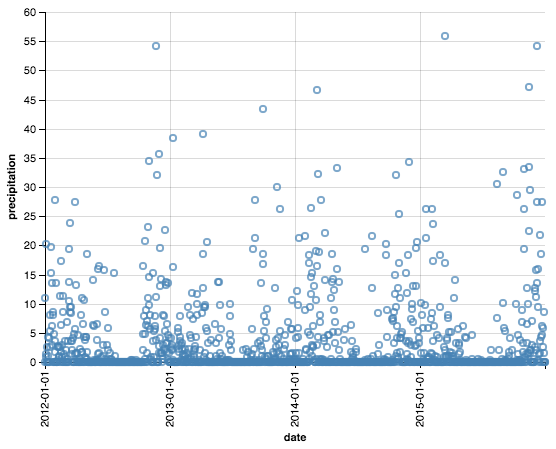

In [21]:
Chart(data).mark_point().encode(
    X('date:T'),
    Y('precipitation')
)

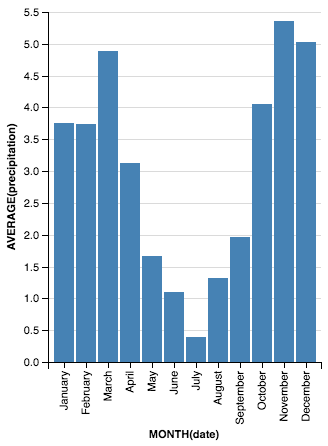

In [22]:
Chart(data).mark_bar().encode(
    X('date:T', timeUnit='month'),
    Y('average(precipitation)')
)

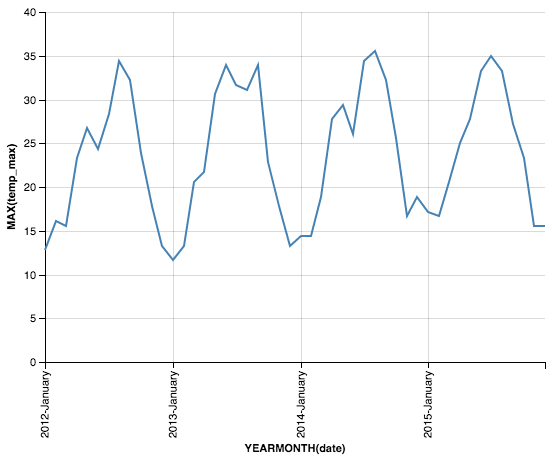

In [23]:
Chart(data).mark_line().encode(
    X('date:T', timeUnit='yearmonth'),
    Y('max(temp_max)'),
)

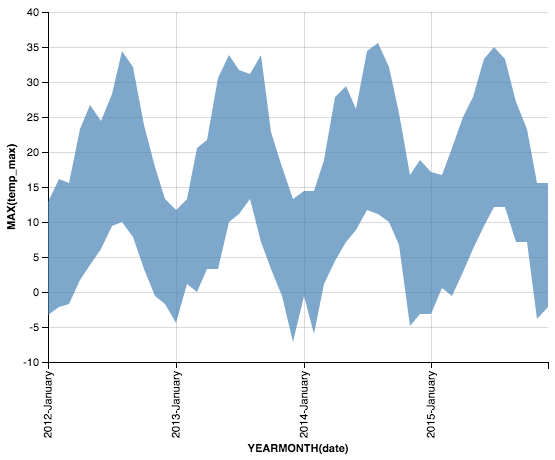

In [24]:
from altair import LayeredChart

Chart(data).mark_area().encode(
    X('date:T', timeUnit='yearmonth'),
    y='max(temp_max)',
    y2='min(temp_min)'
)

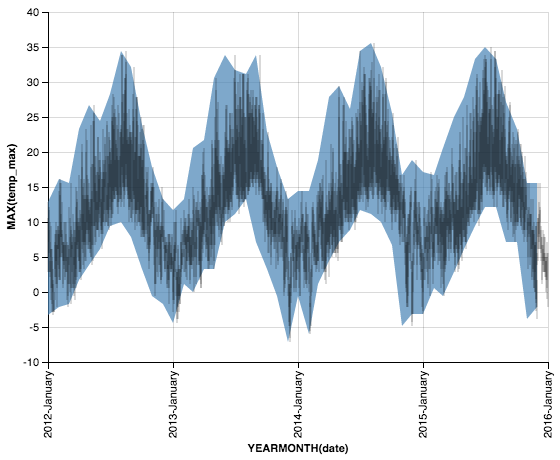

In [25]:
from altair import LayeredChart

# NOTE: Layering API is experimental and will probably change in v2.0

chart = Chart(data).mark_area().encode(
    X('date:T', timeUnit='yearmonth'),
    y='max(temp_max)',
    y2='min(temp_min)'
)

chart += Chart(data).mark_rule(
    color='black',
    opacity=0.3
).encode(
    X('date:T'),
    y='temp_min',
    y2='temp_max'
)

chart.data = data
chart

### Demo: Baseball Stats

In [26]:
import pandas as pd
data_url = 'https://raw.githubusercontent.com/jakevdp/altair-examples/master/data/strikeouts.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,histname,longname,year,histcode,franchise,so,g
1,Boston Beaneaters,1901 Boston Beaneaters,1901,BSN,ATL,518,140
2,Milwaukee Brewers,1901 Milwaukee Brewers,1901,MLA,BAL,387,139
3,Boston Americans,1901 Boston Americans,1901,BOS,BOS,281,138
4,Chicago Orphans,1901 Chicago Orphans,1901,CHC,CHC,530,140
5,Chicago White Sox,1901 Chicago White Sox,1901,CHW,CHW,336,137


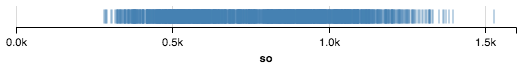

In [27]:
Chart(data_url).mark_tick().encode(
    x='so:Q'
)

In [28]:
chart = Chart(data_url).mark_tick().encode(
    x='so:Q'
)
chart.to_dict()

{'data': {'url': 'https://raw.githubusercontent.com/jakevdp/altair-examples/master/data/strikeouts.csv'},
 'encoding': {'x': {'field': 'so', 'type': 'quantitative'}},
 'mark': 'tick'}

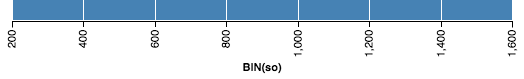

In [29]:
Chart(data_url).mark_bar().encode(
    X('so:Q', bin=True)
)

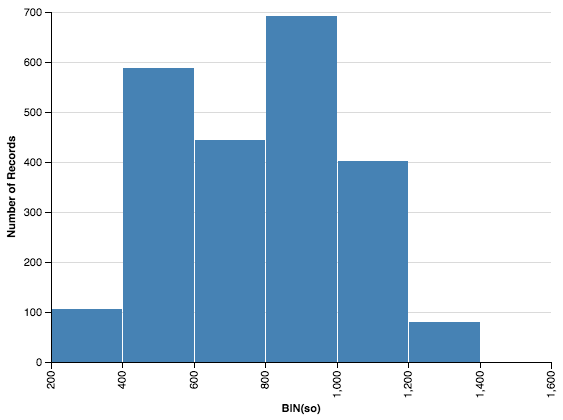

In [30]:
Chart(data_url).mark_bar().encode(
    X('so:Q', bin=True),
    y='count(*):Q'
)

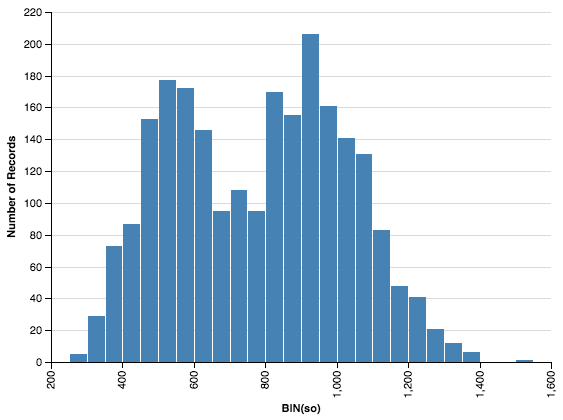

In [31]:
from altair import Bin

Chart(data_url).mark_bar().encode(
    X('so:Q', bin=Bin(maxbins=30)),
    y='count(*):Q',
)

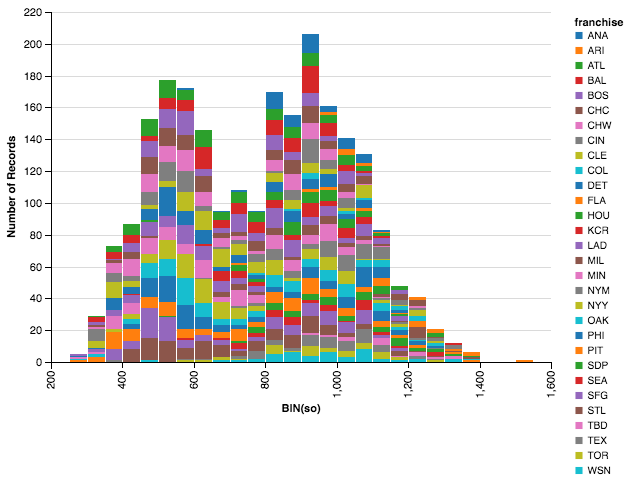

In [32]:
from altair import Bin

Chart(data_url).mark_bar().encode(
    X('so:Q', bin=Bin(maxbins=30)),
    y='count(*):Q',
    color='franchise:N'
)

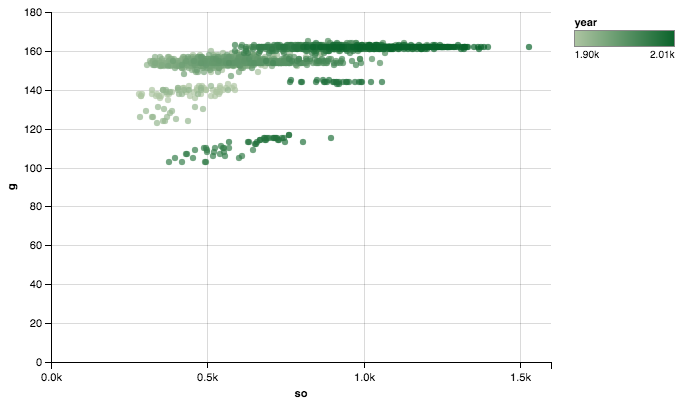

In [33]:
chart = Chart(data_url).mark_circle().encode(
    x='so:Q',
    y='g:Q',
    color='year:Q'
)
chart

In [34]:
chart.to_dict()

{'data': {'url': 'https://raw.githubusercontent.com/jakevdp/altair-examples/master/data/strikeouts.csv'},
 'encoding': {'color': {'field': 'year', 'type': 'quantitative'},
  'x': {'field': 'so', 'type': 'quantitative'},
  'y': {'field': 'g', 'type': 'quantitative'}},
 'mark': 'circle'}

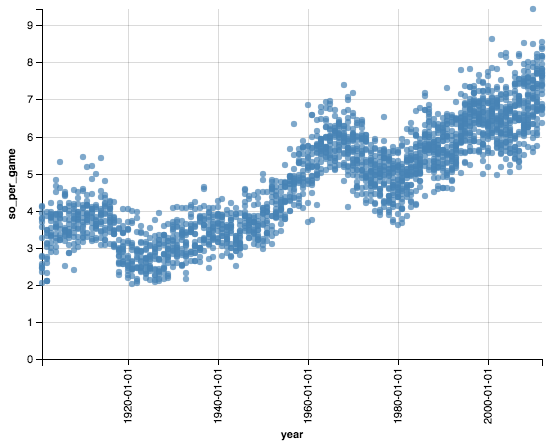

In [35]:
from altair import expr
data = expr.DataFrame(data_url)
data['so_per_game'] = data.so // data.g

Chart(data).mark_circle().encode(
    x='year:T',
    y='so_per_game'
)

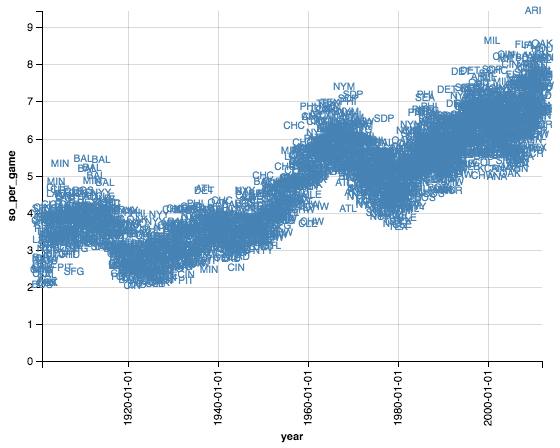

In [36]:
Chart(data).mark_text().encode(
    x='year:T',
    y='so_per_game',
    text='franchise'
)

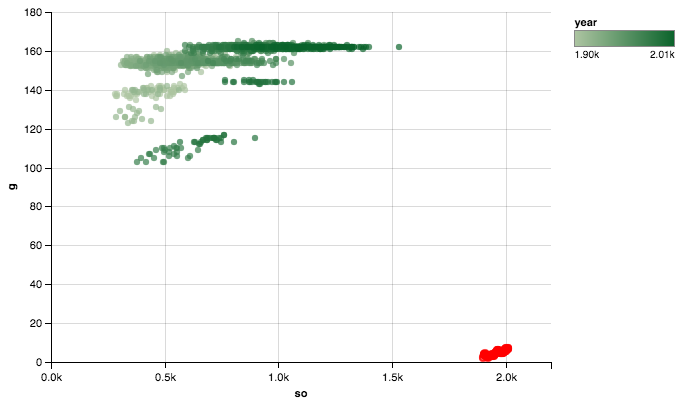

In [37]:
data_filtered = data[data.franchise=='BOS']

points = Chart(data_filtered).mark_point(
    color='red'
).encode(
    x='year:T',
    y='so_per_game'
)

# Note: layers interface is still experimental in version 1.2
layers = chart + points
layers.data = data  # Bug... sorry
layers

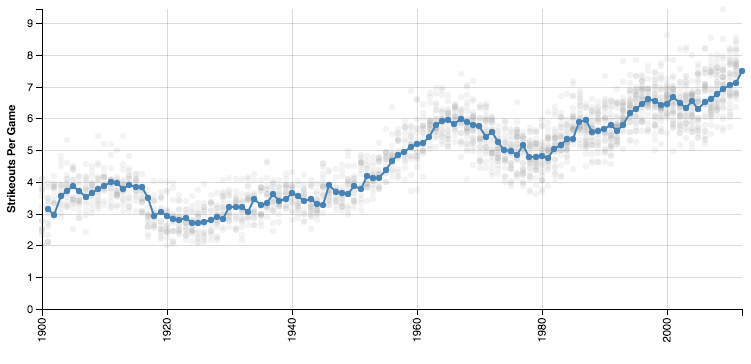

In [38]:
from altair import LayeredChart, Axis

# NOTE: Layering API is preliminary, and will probably be updated

chart = LayeredChart(data).configure_cell(
    height=300,
    width=700
)

chart += Chart().mark_circle(
    color='gray',
    opacity=0.1,
).encode(
    x=X('year:T', timeUnit='year', axis=Axis(title=' ')),
    y=Y('so_per_game', axis=Axis(title='Strikeouts Per Game')),
    detail='histcode:N',
)

chart += Chart().mark_line().encode(
    x='year:T',
    y='mean(so_per_game)',
)

chart += Chart().mark_circle().encode(
    x='year:T',
    y='mean(so_per_game)',
)

chart

### Demo: Interaction with Vega-Lite

Examples listing: http://vega.github.io/vega-lite/examples/

Data URL: https://vega.github.io/vega-datasets/

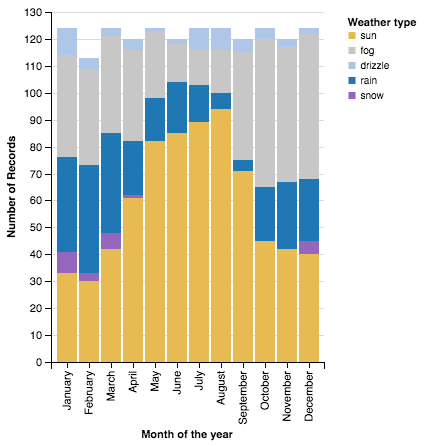

In [39]:
json = """
{
  "data": {"url": "https://vega.github.io/vega-datasets/data/seattle-weather.csv","format": {"type": "csv"}},
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "date",
      "type": "temporal",
      "timeUnit": "month",
      "axis": {"title": "Month of the year"}
    },
    "y": {
      "field": "*",
      "type": "quantitative",
      "aggregate": "count"
    },
    "color": {
      "field": "weather",
      "type": "nominal",
      "scale": {
        "domain": ["sun","fog","drizzle","rain","snow"],
        "range": ["#e7ba52","#c7c7c7","#aec7e8","#1f77b4","#9467bd"]
      },
      "legend": {
        "title": "Weather type"
      }
    }
  }
}
"""

chart = Chart.from_json(json)
chart

In [40]:
print(chart.to_altair())

Chart(Data(
    format=DataFormat(
        type='csv',
    ),
    url='https://vega.github.io/vega-datasets/data/seattle-weather.csv',
)).mark_bar().encode(
    color=Color('weather:N',
        legend=Legend(
            title='Weather type',
        ),
        scale=Scale(
            domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
            range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'],
        ),
    ),
    x=X('date:T',
        axis=Axis(
            title='Month of the year',
        ),
        timeUnit='month',
    ),
    y='count(*):Q',
)


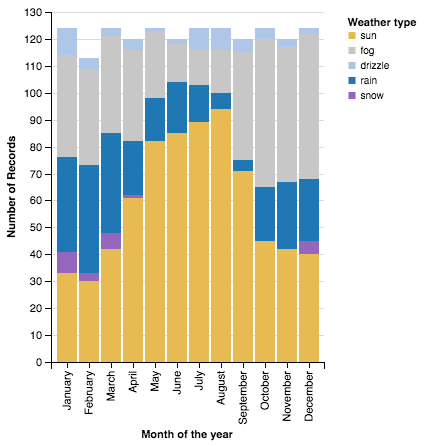

In [41]:
from altair import *
eval(chart.to_altair())

## Future Work

- More plot types
- Higher-level Statistical routines
- Improve layering API
- Add interface to vega-tooltip
- Vega-Lite's Grammar of Interaction (See http://idl.cs.washington.edu/papers/vega-lite/)